In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import (TextArea, AnnotationBbox)
import numpy as np
import ast

In [21]:
data_path = '/Users/josephking/Documents/sponsored_projects/MERGEN/data/pix2pix/MERGEN/test_/thermal'
df = pd.read_csv('/Users/josephking/Documents/sponsored_projects/MERGEN/output/MakeModelClassifier/2021-12-14-14h28/Bboxes_yolov5_thermal.csv')
df['Source Path'] = df['Source Path'].apply(lambda x: data_path + '/' + x)

df['Bboxes'] = df['Bboxes'].apply(lambda x: list(ast.literal_eval(x)))
df = df.loc[df.Bboxes.str.len() != 0].reset_index(drop=True)  # restrict to rows with bounding boxes

In [42]:
df = df.sample(n=100, random_state=123).reset_index(drop=True)

/Users/josephking/Documents/PythonVenv/MERGEN/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


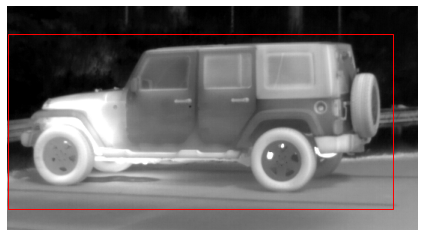

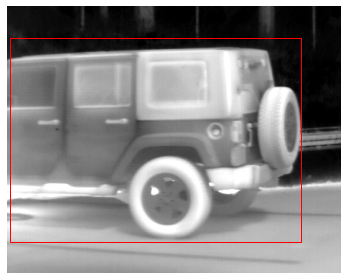

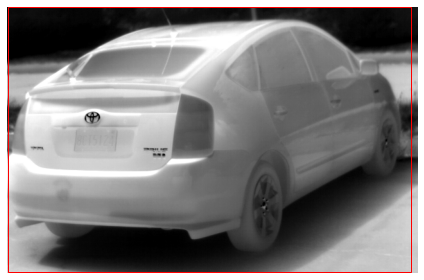

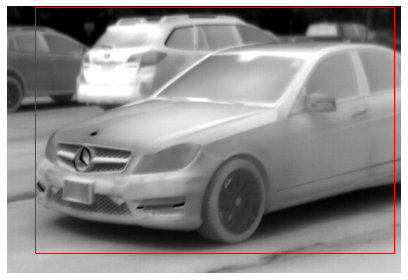

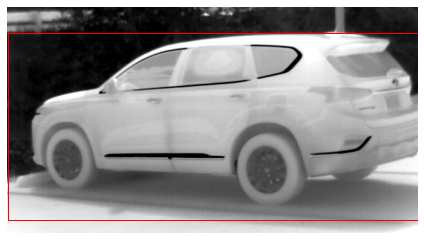

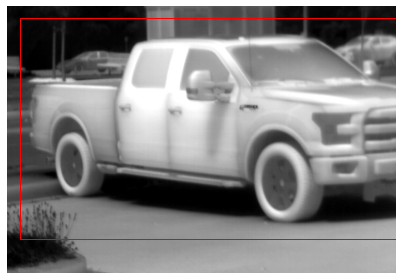

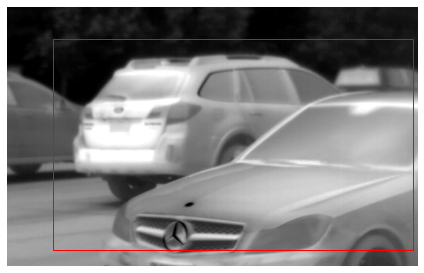

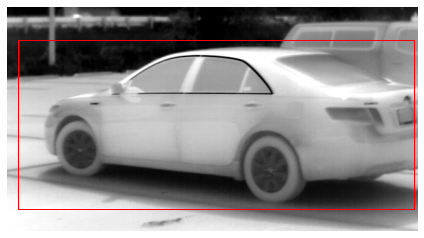

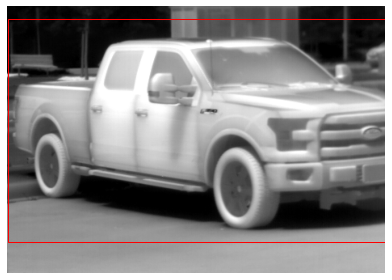

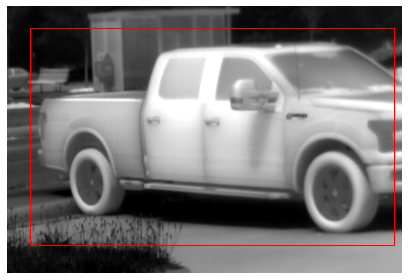

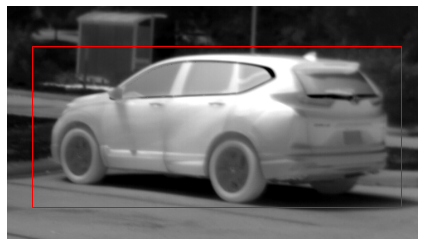

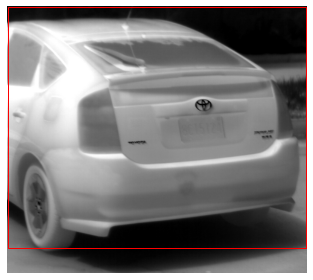

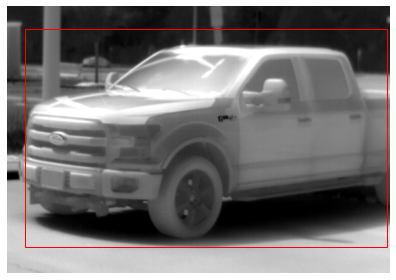

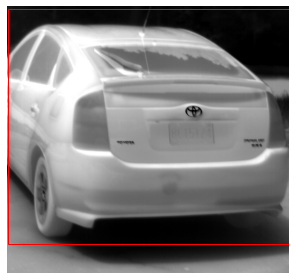

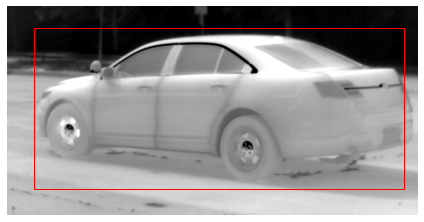

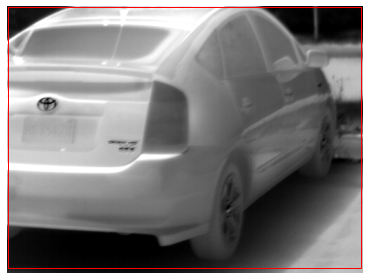

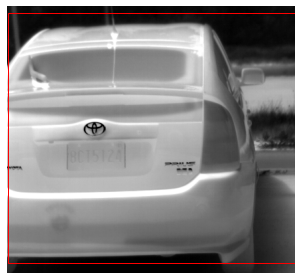

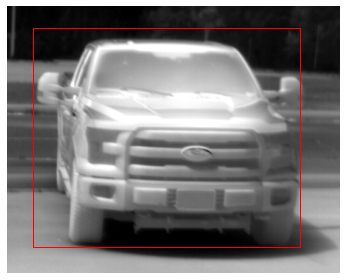

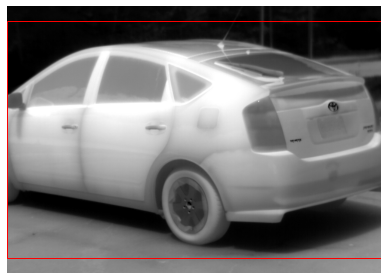

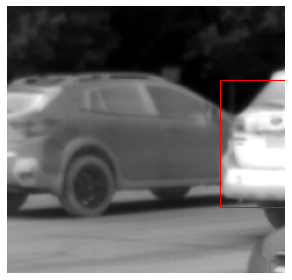

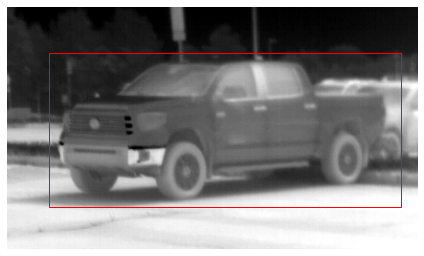

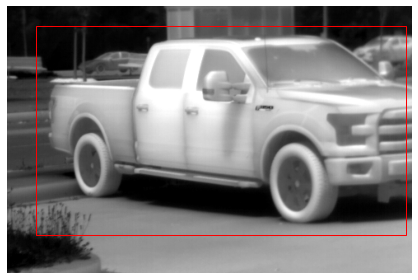

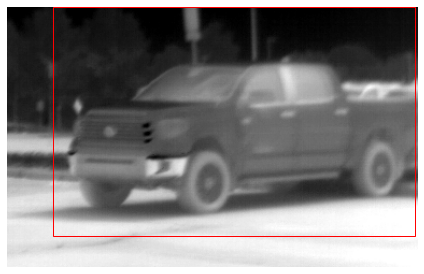

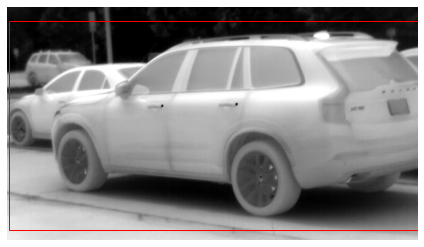

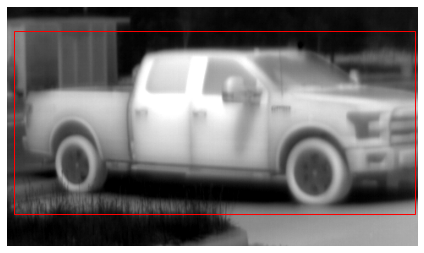

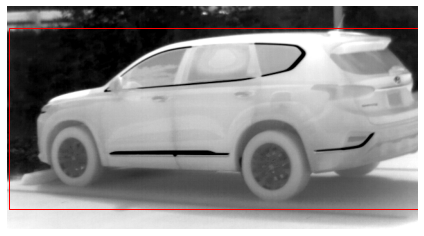

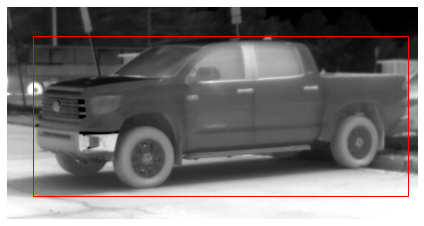

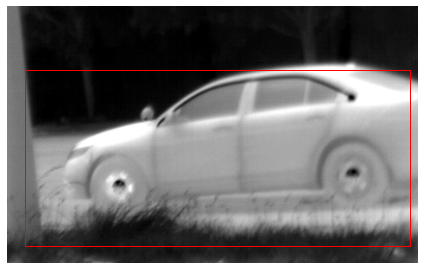

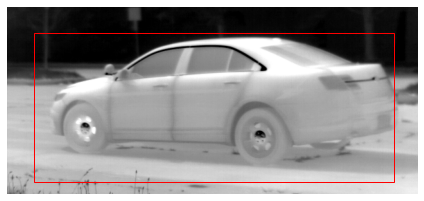

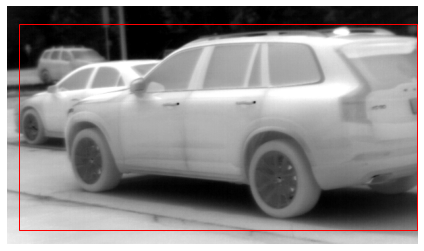

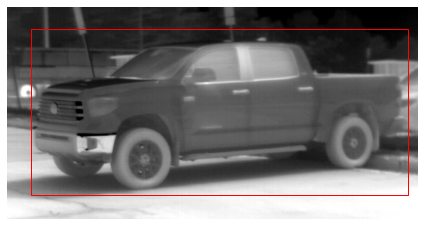

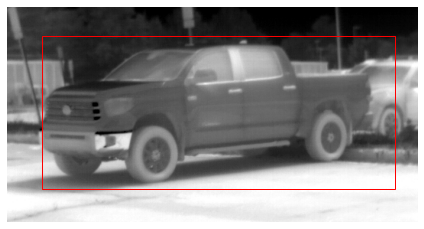

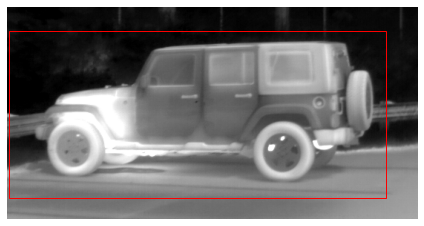

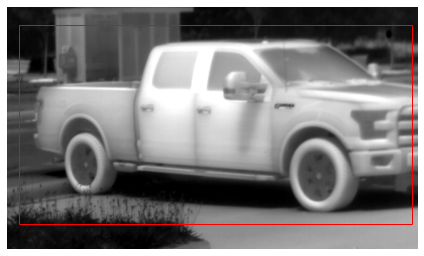

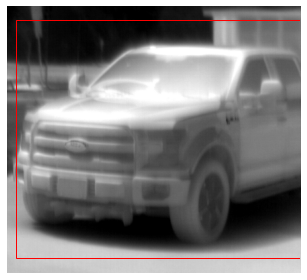

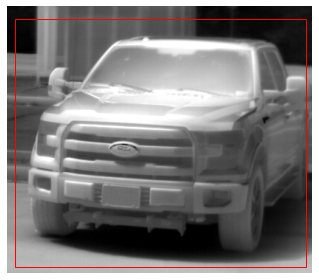

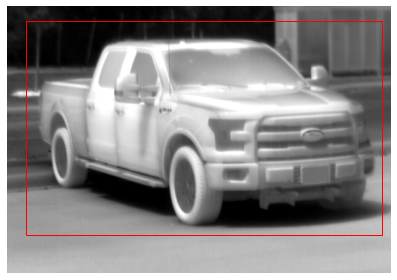

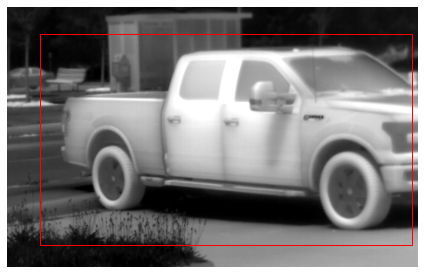

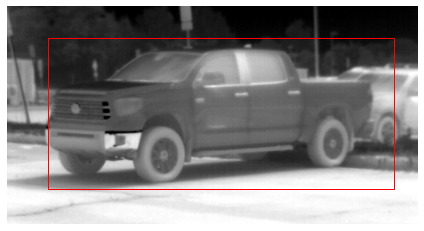

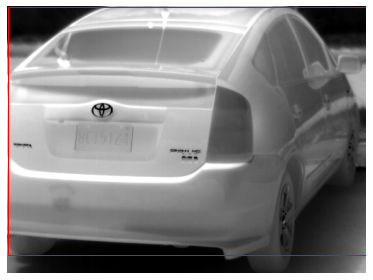

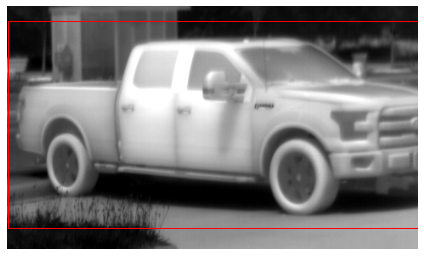

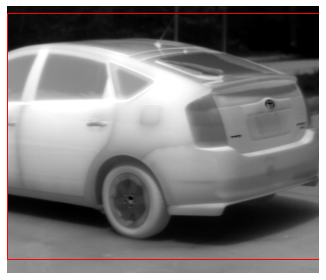

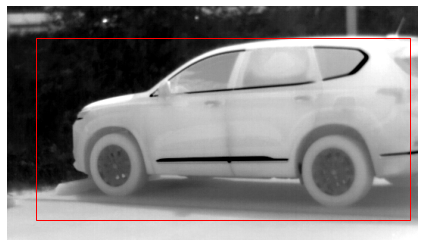

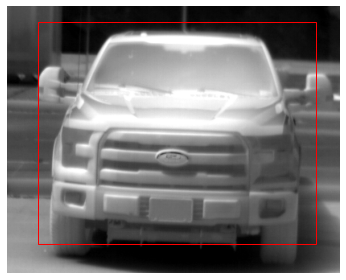

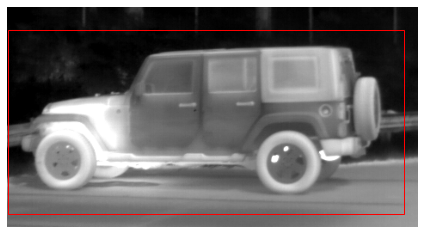

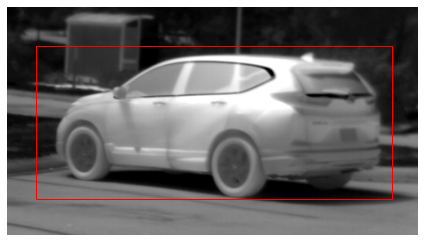

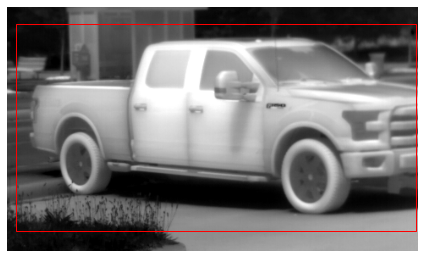

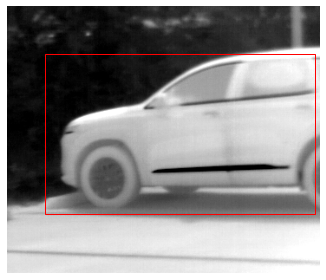

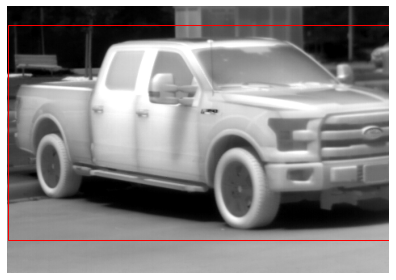

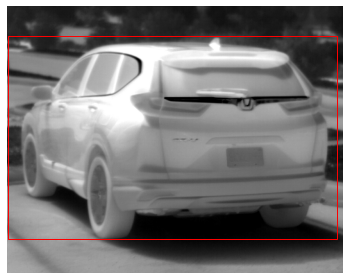

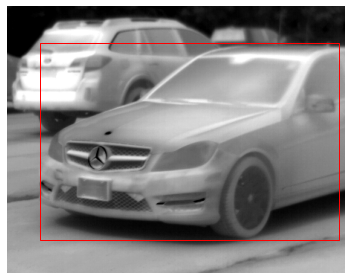

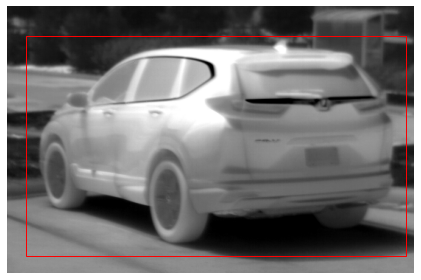

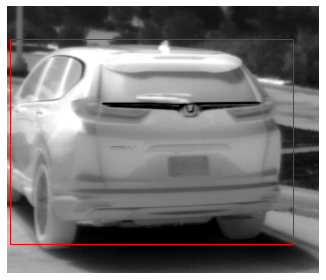

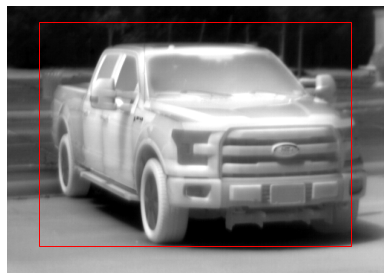

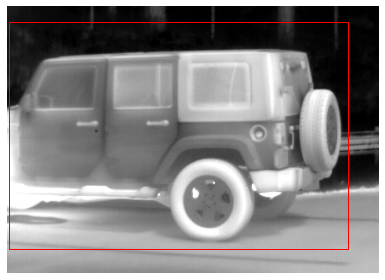

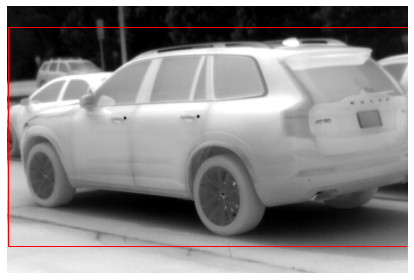

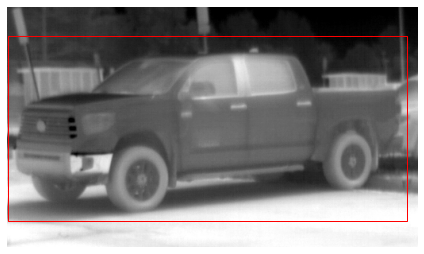

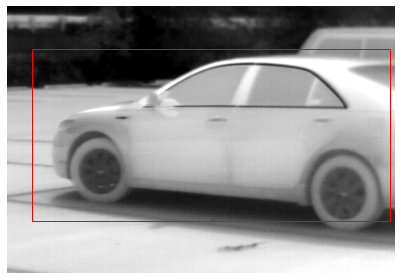

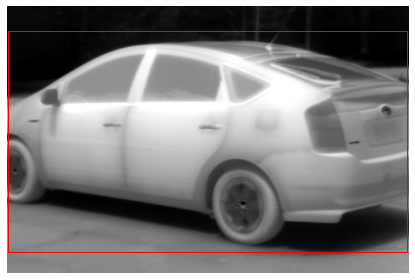

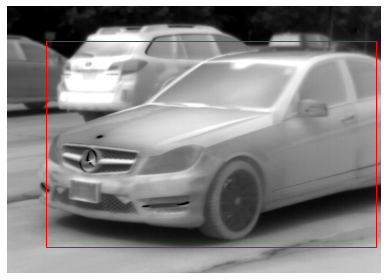

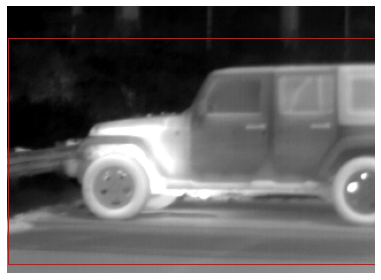

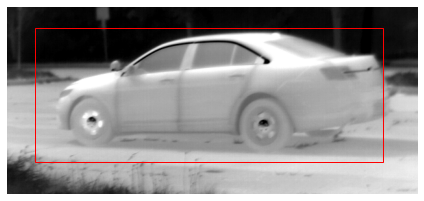

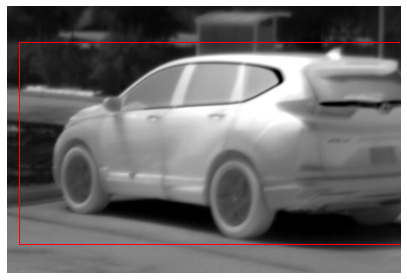

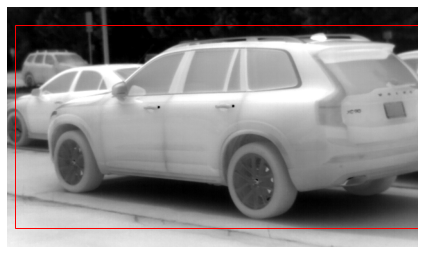

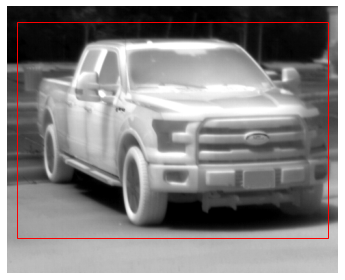

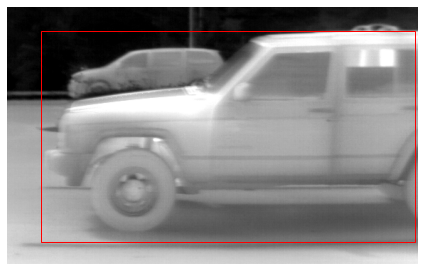

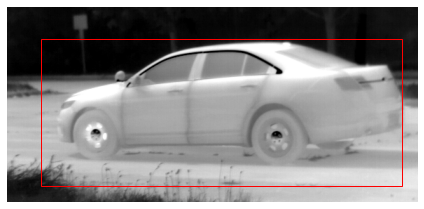

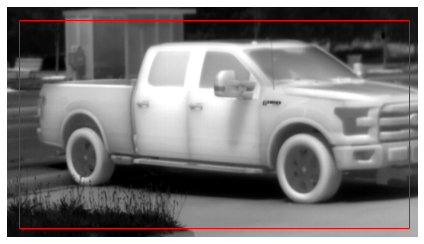

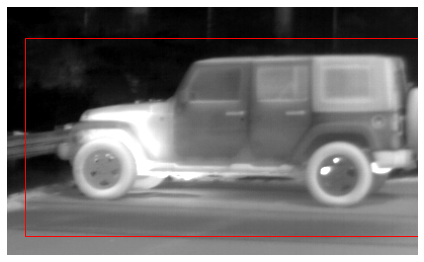

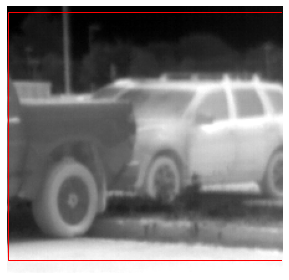

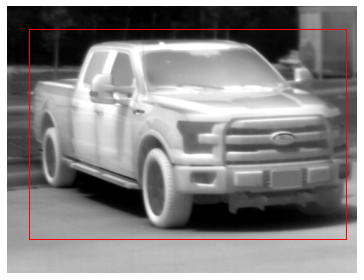

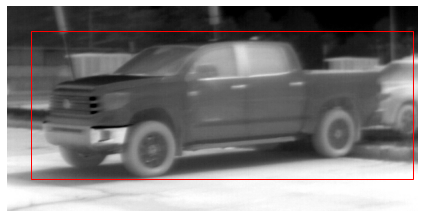

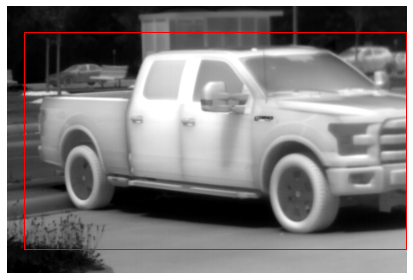

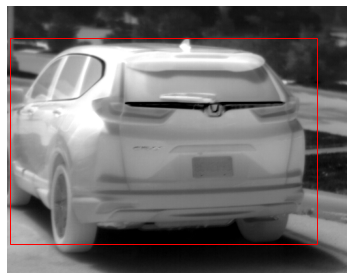

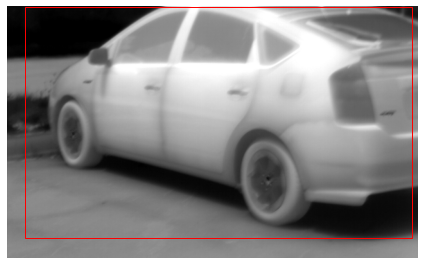

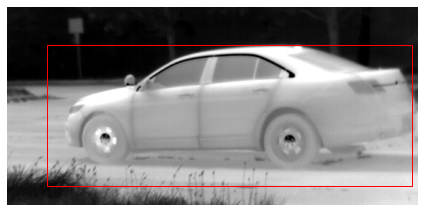

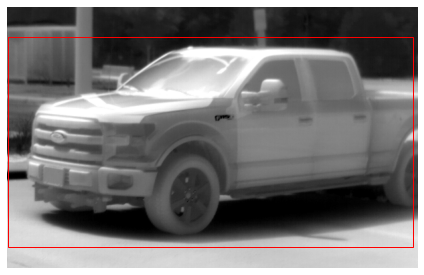

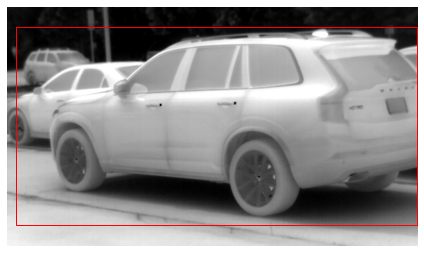

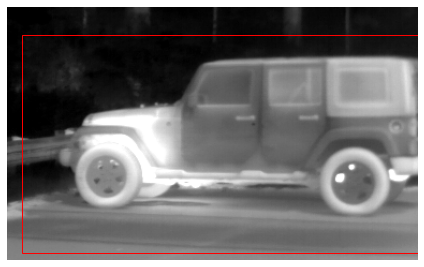

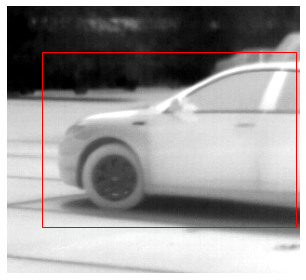

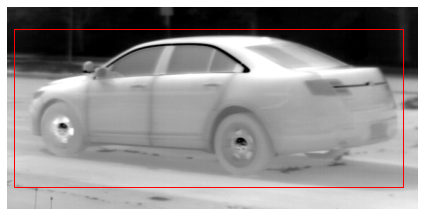

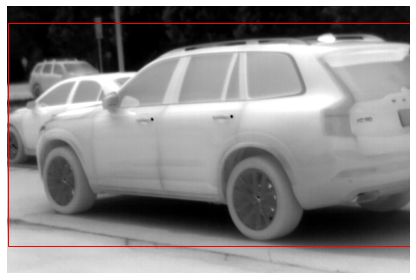

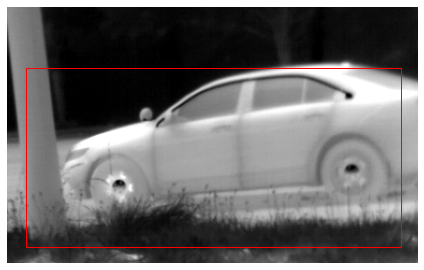

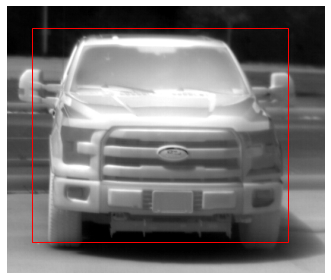

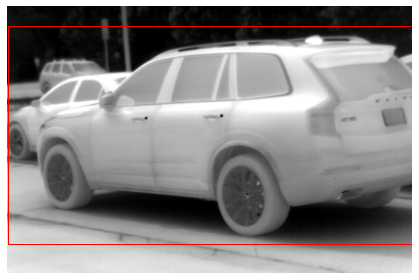

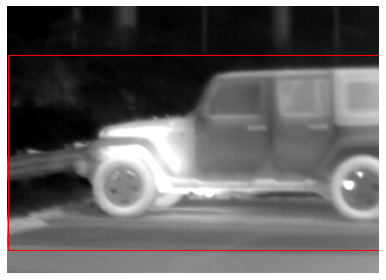

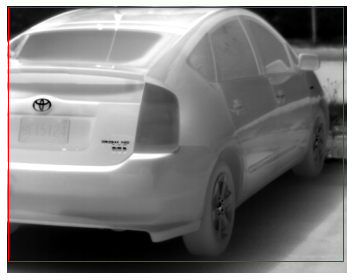

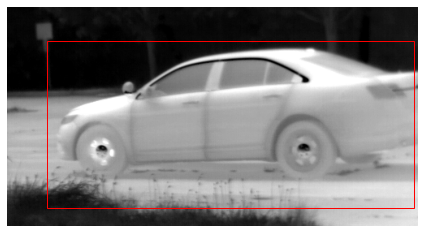

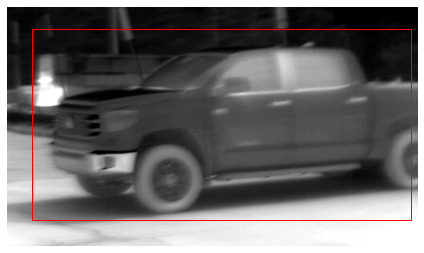

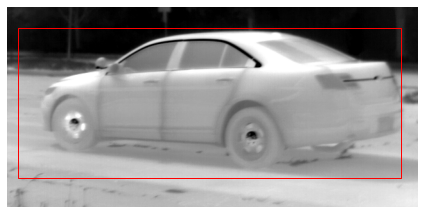

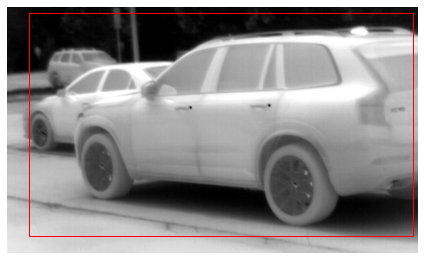

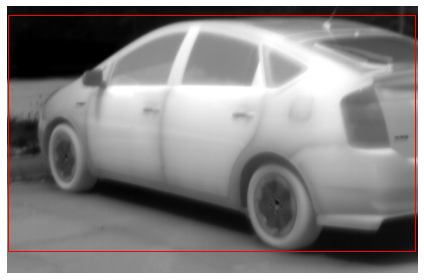

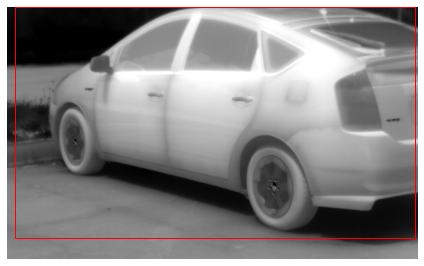

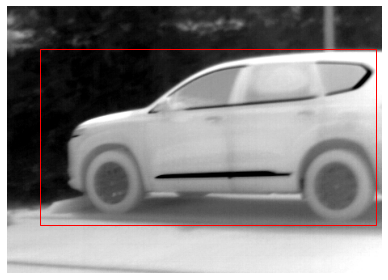

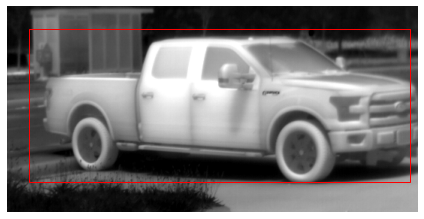

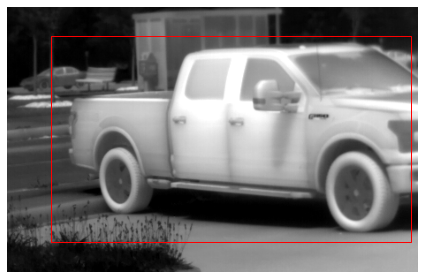

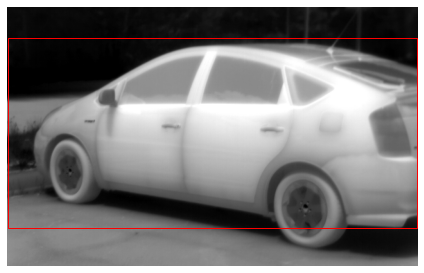

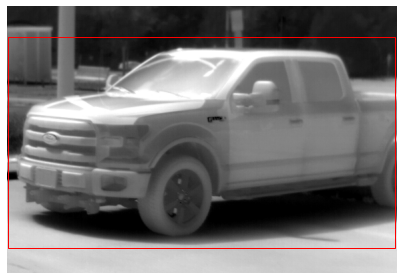

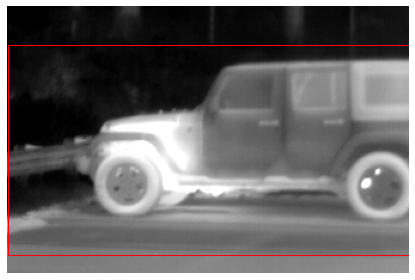

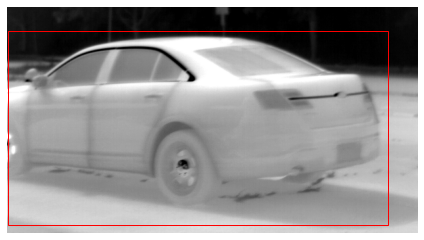

In [44]:
for i in range(len(df)):
    sample = df.iloc[i]
    
    img = plt.imread(sample['Source Path'])
    
    xy = np.concatenate((np.array([sample['Bboxes'][0]]), np.array([sample['Bboxes'][1]])))
    y_delta = np.array([sample['Bboxes'][3] - sample['Bboxes'][1]])
    x_delta = np.array([sample['Bboxes'][2] - sample['Bboxes'][0]])


    plt.cla()
    ax = plt.gca()
    ax.imshow(img)
    rec = Rectangle((xy[0], xy[1]), x_delta, y_delta, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rec)
    plt.axis('off')
    plt.tight_layout()
    plt.show()